# Assessment: Unit 4
--------------------

Complete the problems below in your copy of the Jupyter Notebook.

## Problem 4.1.

Polymer films are commonly tested by clamping the film between two points, starting at a known separation distance, $l_0$ and beginning to move one of the clamps away from the other at a fixed rate. The time, displacement and force are recorded with a microcontroller.

Given a starting clamp separation, $l_0$, and clamp displacement, $l$, the elongation of the film is given by

$$\text{elongation}=\frac{l}{l_0}$$

In addition to the maximum force and elongation to break the film, a "yield" point may be observed, where the slope of the force v. elongation curve goes to zero and decreases. This is the result of a "neck" forming in the sample. 

1. Load the data from the `tensile_curve.csv` file into a `pandas.DataFrame`
2. Compute the elongation from the displacement data, assuming a starting separation of 50 cm
3. Smooth the noisy force data by computing the rolling mean over an interval $N=5$, centering the value in the interval
4. Identify the yield point
   - Compute the numerical derivative of the force/elongation curve
   - Find the first zero of the derivative
5. Plot the results of the analysis
   - The raw force, elongation data as scatter points
   - The smoothed



Filter by categorial variable and plot scatter with smoothing



Text(7.234640000000001, 15.502725000000002, 'Yield')

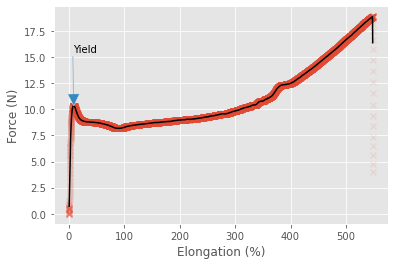

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

df = pd.read_csv('../../data/tensile_curve.csv')

df.head()
# compute the elongation
df['Elongation'] = 100*(df['Displacement (mm)'] / 50)

# apply rolling mean
N = 50
df['Smoothed'] = df['Force (N)'].rolling(N, center=True).mean()

# compute the derivative
df['Derivative'] = df['Smoothed'].diff() / df['Elongation'].diff()

yield_index = df[df['Derivative']<0].index.min()
yield_x = df.iloc[yield_index]['Elongation']
yield_y = df.iloc[yield_index]['Force (N)']


fig, ax = plt.subplots()

ax.scatter(df['Elongation'], df['Force (N)'], marker='x', alpha=0.1)
ax.plot(df['Elongation'], df['Smoothed'], c='black')

ax.set_xlabel('Elongation (%)')
ax.set_ylabel('Force (N)')

ax.annotate('Yield', (yield_x, yield_y), (0.8*yield_x, 1.5*yield_y), arrowprops={'width': 1})

## Problem 4.2.

Plot the mean modulus in MPa for a series of polymer films, using the `ggplot` style.

1. Load the file `film_testing.xlsx` into a `pandas.DataFrame`
2. Select the "Tensile Modulus" data
3. Create a pivot table of this measurement, by film id
4. Create a bar chart with the mean values of the modulus, by grade
5. Label the plot axes

Text(0, 0.5, 'Tensile Modulus (MPa)')

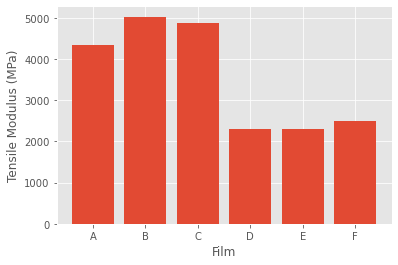

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# load data and filter
df = pd.read_excel('../../data/film_testing.xlsx', sheet_name='physical_properties')
df_mod = df[df['Property']=='Tensile Modulus']

# pivot to average by film id
pt = df_mod.pivot_table(values='Measurement', index='FilmID', aggfunc='mean')

# create a range for the x-values in the plot
x = np.arange(len(pt))

# plot the bar
fig, ax = plt.subplots()
ax.bar(x, pt['Measurement'])

# set the x tick marks and labels
ax.set_xticks(x)
ax.set_xticklabels(pt.index)

# label the plot axes
ax.set_xlabel('Film')
ax.set_ylabel('Tensile Modulus (MPa)')

## Problem 4.3.

In [4]:
seal_df = pd.read_csv('../../data/seal_curve.csv')
seal_df.head()

,temperature,replicate,peak_strength,failure_mode
0,80,1,0.0,0
1,80,2,0.0,0
2,80,3,0.0,0
3,85,1,0.0,0
4,85,2,0.0,0


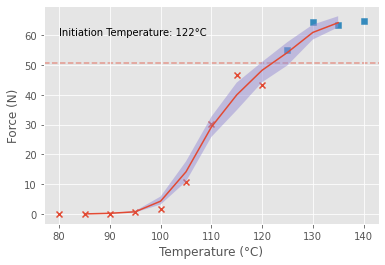

In [21]:
seal_pt = seal_df.pivot_table(index='temperature', values=['peak_strength', 'failure_mode'], aggfunc='mean')
seal_pt_minmax = seal_df.pivot_table(index='temperature', values='peak_strength', aggfunc=['min', 'max'])

peelable_df = seal_pt[seal_pt['failure_mode']==0]
destruct_df = seal_pt[seal_pt['failure_mode']==1]

destruct_force = (peelable_df['peak_strength'].max() + destruct_df['peak_strength'].min())/2
initiation_temp = (peelable_df.index.max() + destruct_df.index.min())/2

seal_smoothed = seal_pt['peak_strength'].rolling(3, center=True).mean()

fig, ax = plt.subplots()

ax.scatter(peelable_df.index, peelable_df['peak_strength'], marker='x')
ax.scatter(destruct_df.index, destruct_df['peak_strength'], marker='s')

ax.plot(seal_pt.index, seal_smoothed)

ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Force (N)')

ax.axhline(destruct_force, ls='--', zorder=0, alpha=0.5)
ax.text(80, 60, f'Initiation Temperature: {initiation_temp:0.0f}°C')


seal_min = seal_pt_minmax['min']['peak_strength'].rolling(3, center=True).mean()
seal_max = seal_pt_minmax['max']['peak_strength'].rolling(3, center=True).mean()

ax.fill_between(seal_pt_minmax.index, seal_min, seal_max, alpha=0.5, zorder=1)

plt.savefig('../../output/problem3-3-default.png', dpi=300)


--------------
## Next Steps:

1. Advance to [Unit 5](../05-/unit05-lesson.ipynb) when you're ready for the next step